<a href="https://colab.research.google.com/github/Suman-Adhikary/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset.

In [4]:
dataset = pd.read_csv('diabetes.csv')
dataset.shape

(100000, 9)

In [5]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Exploratory data analysis(EDA).

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Univariate analysis.

### Gender.

In [13]:
dataset['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

### Smoking history.

In [14]:
dataset['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

### Hypertension.

In [15]:
dataset['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

### Heart disease.

In [16]:
dataset['heart_disease'].value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

### Diabetes.

In [17]:
dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### Count plot.

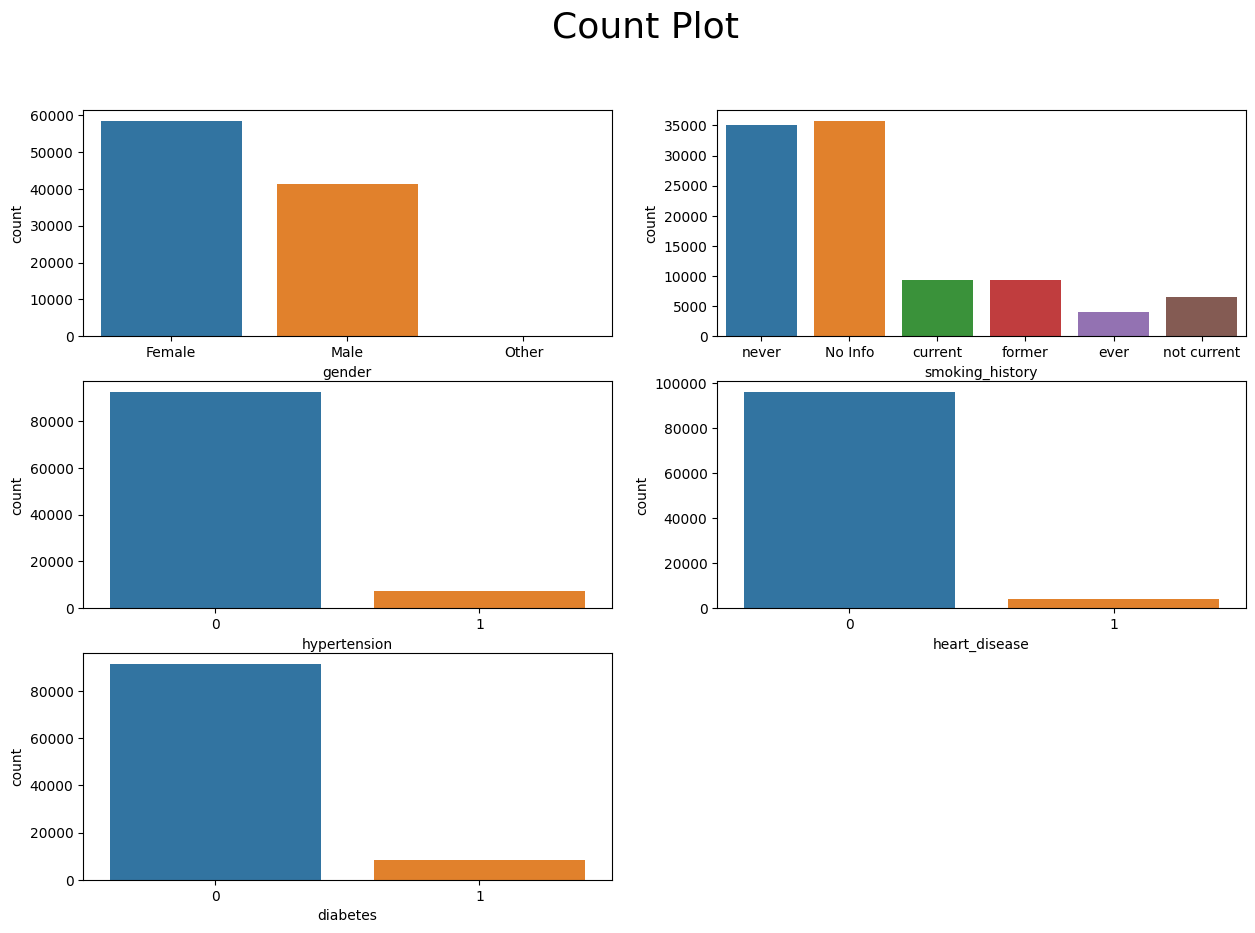

In [19]:
col = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

fig, axs = plt.subplots(3, 2, figsize=(15, 10), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Count Plot", fontsize=26)
plt.show()

### Histogram.

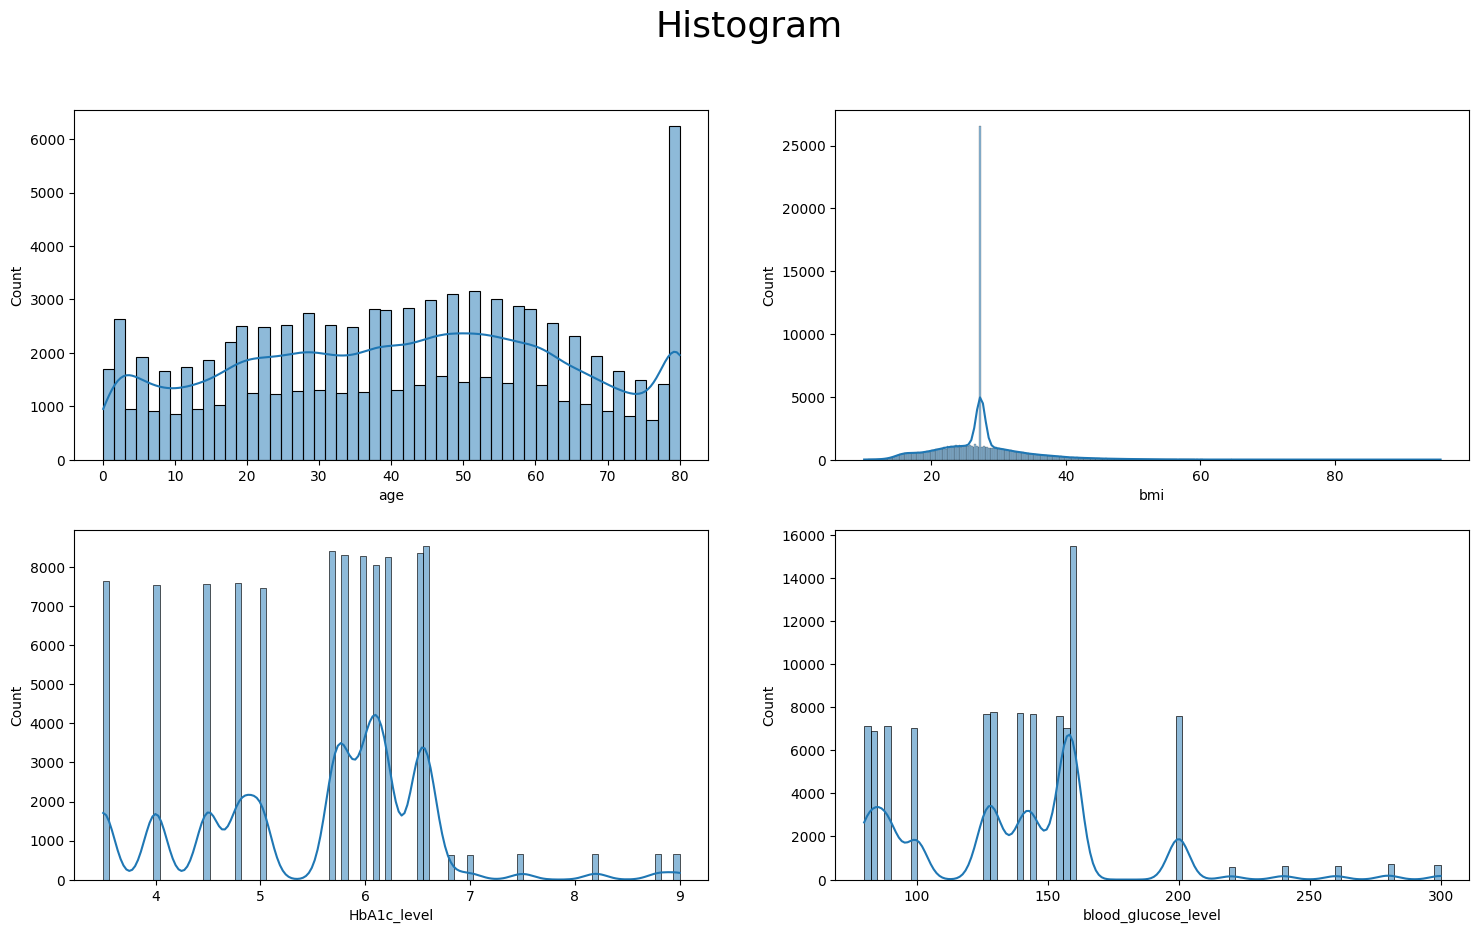

In [21]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(data = dataset, x = col[i], kde = True, ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Histogram", fontsize=26)
plt.show()

### Box plot.

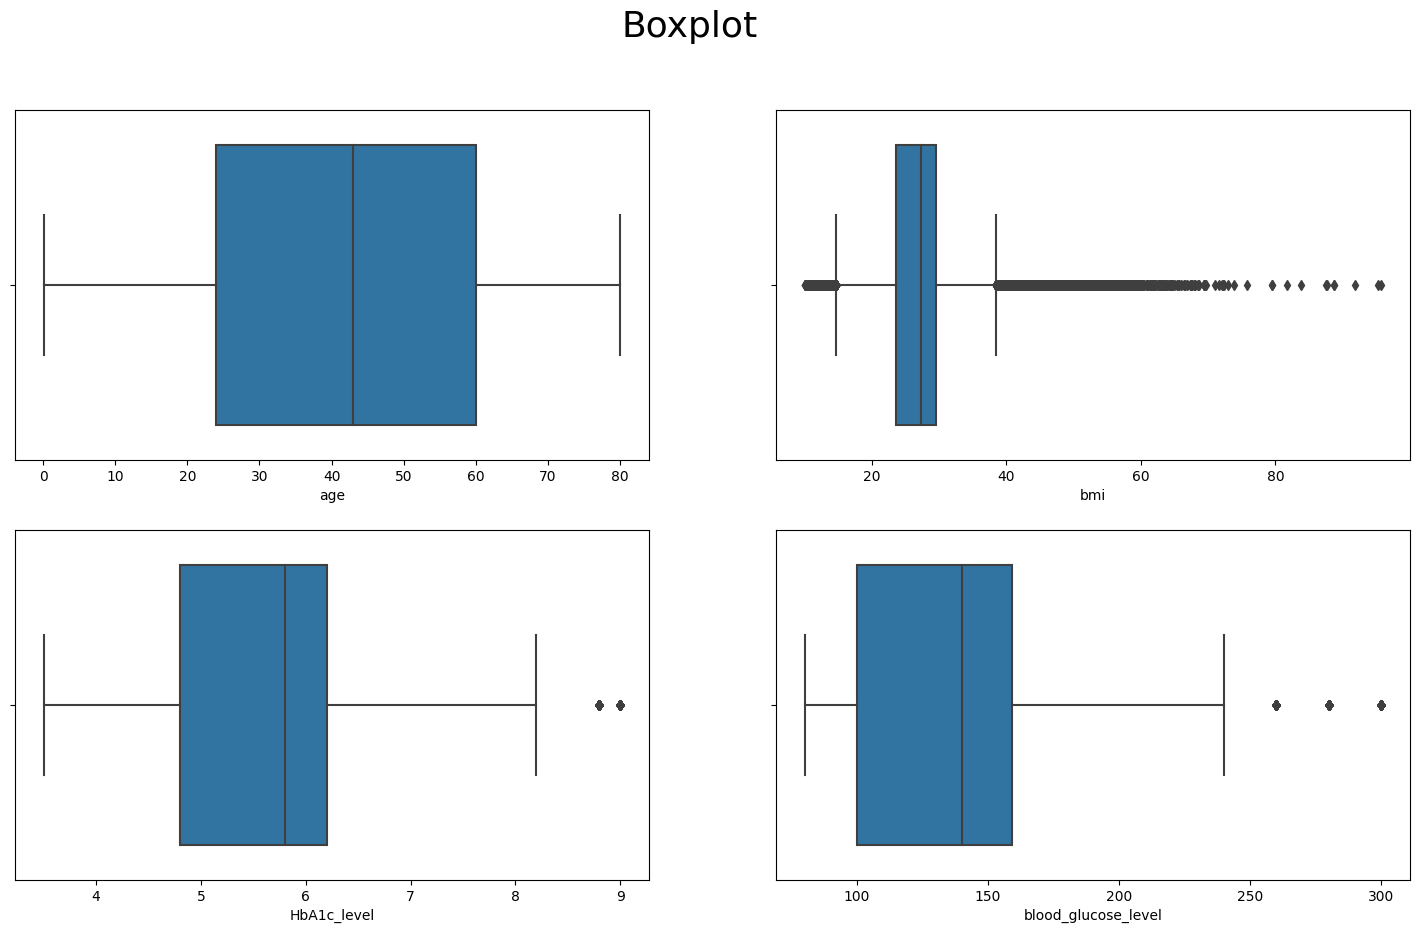

In [22]:
col = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axs = plt.subplots(2, 2, figsize=(18, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.boxplot(data = dataset, x = col[i], ax=Axis[i])

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
fig.suptitle("Boxplot", fontsize=26)
plt.show()